# Principal Component Analysis (PCA)

There are two techniques for dimensionality reduction: **PCA and t-SNE**

**PCA**: stands for Principal Component Analysis and it is orthogonal projection that spreads data as much as possible. It captures the maximum amount of variance in the data.
**PCA** finds directions that are mutually orthogonal.

The main idea is to project the data on particulary chosen unit vectors that tries to preserve as much data as possible.

when we project a data point $x$ on a unit vector $u$, $(x^{T}.u)^{2}$ is the amount of information of $x$ that is preserved after projection on $u$

So the PCA tries to maximize the $\sum \limits_{i} (x_{i}^{T}u)^{2}$

Let's denote $C$ the covariance matrix of the dataset: $C = (1/n)*\sum \limits_{i} x_{i}x_{i}^{T}$ where $x_{i}$ are the data points (we have $n$ of them).

So the **direction $u$** that preserves information the most after projection satisfies **$Cu = \lambda u$** and these are the **eigenvectors** and **eigenvalues** of the covariance matrix $C$

The best eigenvectors to pick are the ones with largest eigenvalues. In fact the eigenvalues represents the variance in the data that will be relevant for our analysis.

## 1. MNIST Dataset

Let's apply PCA and t-SNE on **MNIST** dataset

### 1.1 PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold, datasets, decomposition 

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**MNIST** dataset has 60,000 grayscale images of handwritten digits from **0 to 9**
Everey image is 28x28 pixels


In [2]:
# Load the dataset
mnist = datasets.load_digits()
X = mnist.data
Y = mnist.target
n_samples, n_features = X.shape

print(X.shape)

(1797, 64)


When the number of features is big, PCA becomes very helpul in reducing dimensionality and getting more insights from the data.

In this example, I will use PCA to reduce the dimensionality of data from 64 to 2

In [3]:
X_PCA = decomposition.PCA(n_components=2).fit_transform(X)

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


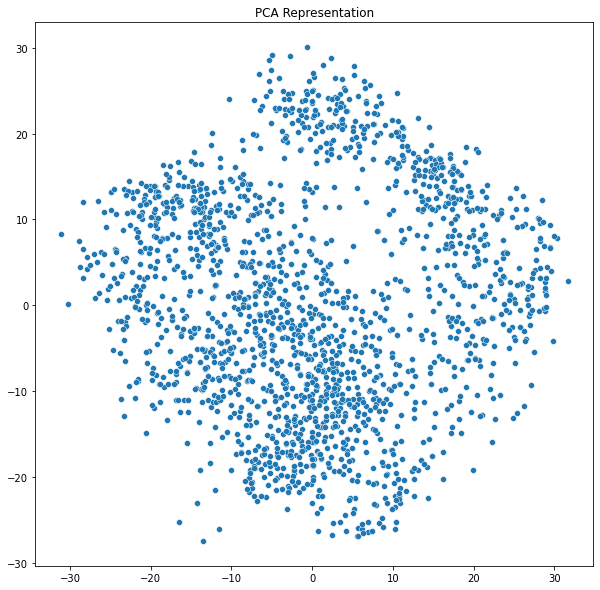

In [4]:
# Let's plot the data for better visualization

X1 = []
X2 = []

for x in X_PCA:
    X1.append(x[0])
    X2.append(x[1])
    
plt.figure(figsize=(10,10))
sns.scatterplot(X1, X2)
plt.title('PCA Representation')
plt.show()

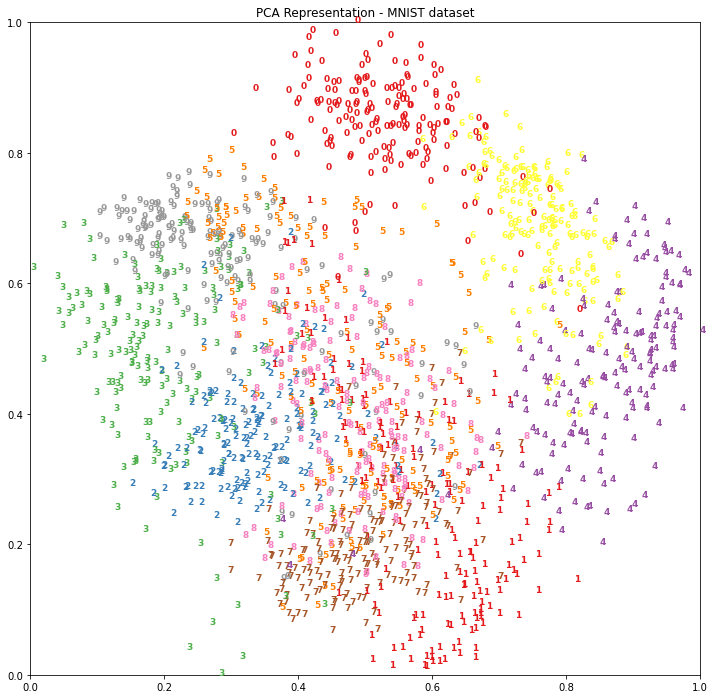

In [5]:
# Scale X_PCA

x_min, x_max = np.min(X_PCA,0), np.max(X_PCA,0)

X_PCA_Scaled = (X_PCA-x_min)/(x_max - x_min)

plt.figure(figsize = (12, 12))               
    
ax = plt.subplot(111)
    
for i in range(X_PCA_Scaled.shape[0]):
        
    plt.text(X_PCA_Scaled[i, 0], X_PCA_Scaled[i, 1], str(Y[i]),
                 
    color = plt.cm.Set1(Y[i] / 10.),
                 
    fontdict = {'weight': 'bold', 'size': 9})

plt.title('PCA Representation - MNIST dataset')
plt.show()

### 1.2 t-SNE

In [23]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


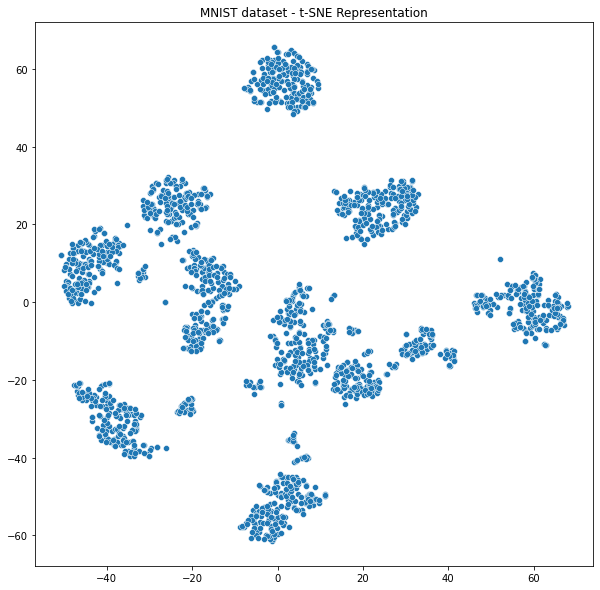

In [24]:
# Let's plot the data for better visualization

X1_tsne = []
X2_tsne = []

for x in X_tsne:
    X1_tsne.append(x[0])
    X2_tsne.append(x[1])
    
plt.figure(figsize=(10,10))
sns.scatterplot(X1_tsne, X2_tsne)
plt.title('MNIST dataset - t-SNE Representation')
plt.show()

We can see that the clusters are more visible with t-sne

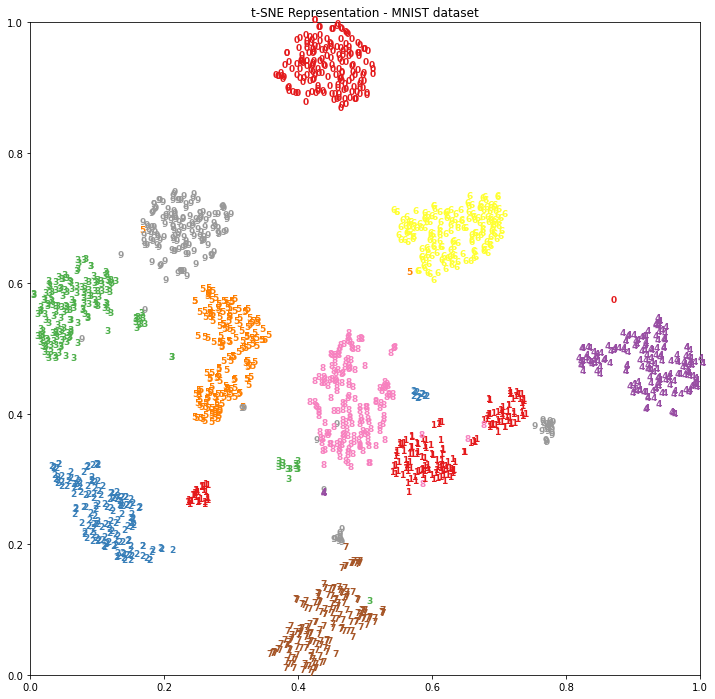

In [26]:
# Scale X_tsne

x_min_tsne, x_max_tsne = np.min(X_tsne,0), np.max(X_tsne,0)

X_tsne_Scaled = (X_tsne-x_min_tsne)/(x_max_tsne - x_min_tsne)

plt.figure(figsize = (12, 12))               
    
ax = plt.subplot(111)
    
for i in range(X_tsne_Scaled.shape[0]):
        
    plt.text(X_tsne_Scaled[i, 0], X_tsne_Scaled[i, 1], str(Y[i]),
                 
    color = plt.cm.Set1(Y[i] / 10.),
                 
    fontdict = {'weight': 'bold', 'size': 9})

plt.title('t-SNE Representation - MNIST dataset')
plt.show()

## 2. Cancer Dataset

This dataset's source is https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida


**Dataset details From Kaggle**

Here we present the Curated Microarray Database (CuMiDa), a repository containing 78 handpicked cancer microarray datasets, extensively curated from 30.000 studies from the Gene Expression Omnibus (GEO), solely for machine learning. The aim of CuMiDa is to offer homogeneous and state-of-the-art biological preprocessing of these datasets, together with numerous 3-fold cross validation benchmark results to propel machine learning studies focused on cancer research. The database make available various download options to be employed by other programs, as well for PCA and t-SNE results. CuMiDa stands different from existing databases for offering newer datasets, manually and carefully curated, from samples quality, unwanted probes, background correction and normalization, to create a more reliable source of data for computational research.

In [6]:
df = pd.read_csv('Breast_GSE45827.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [7]:
df.shape

(151, 54677)

In [8]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


In [10]:
df.type.value_counts()

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

In [11]:
df.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

<AxesSubplot:>

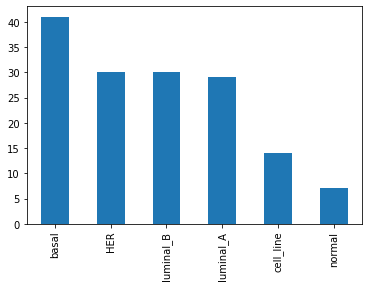

In [12]:
df.type.value_counts().plot(kind='bar')

In [13]:
df_x = df.iloc[:, 2:].values
df_x.shape

(151, 54675)

In [14]:
df_y = df.iloc[:,1]
df_y[:5]

0    basal
1    basal
2    basal
3    basal
4    basal
Name: type, dtype: object

In [15]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
cancer_scaler = StandardScaler()
df_x_scaled = cancer_scaler.fit_transform(df_x)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label Encoder
label_encoder = LabelEncoder()
df_y_encoded = label_encoder.fit_transform(df_y)
print(df_y_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4]


### 2.1 PCA

In [17]:
df_PCA_2 = decomposition.PCA(n_components=2).fit_transform(df_x_scaled)

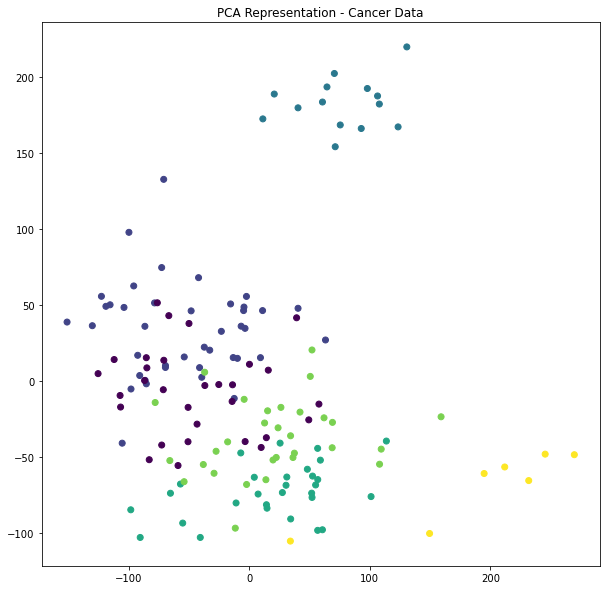

In [18]:
# Let's plot the data for better visualization

df1 = []
df2 = []

for x in df_PCA_2:
    df1.append(x[0])
    df2.append(x[1])
    
plt.figure(figsize=(10,10))
plt.scatter(df1, df2, c=df_y_encoded)
plt.title('PCA Representation - Cancer Data')
plt.show()

In [20]:
df_PCA_3 = decomposition.PCA(n_components=3).fit_transform(df_x_scaled)

In [21]:
colors = ['green', 'blue', 'red', 'yellow', 'purple', 'pink']

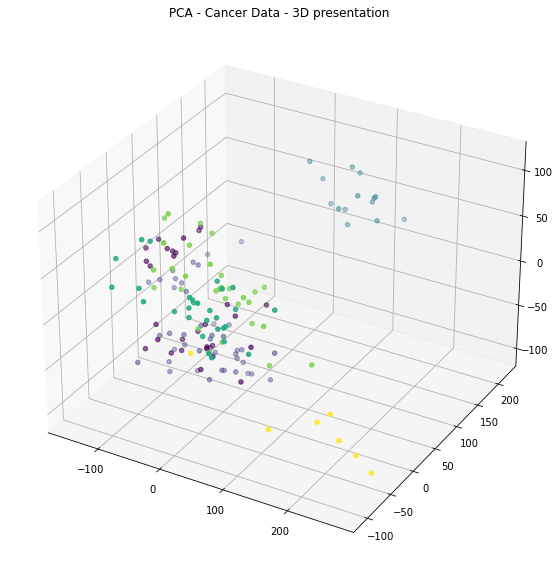

In [22]:
# Creating figure
fig3D = plt.figure(figsize = (10, 10))
ax3D = plt.axes(projection ="3d")
 
# Creating plot
ax3D.scatter3D(df_PCA_3[:,0], df_PCA_3[:,1], df_PCA_3[:,2], c=df_y_encoded)
plt.title("PCA - Cancer Data - 3D presentation")
 
# show plot
plt.show()

### 2.2 t-SNE

In [27]:
cancer_tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
cancer_X_tsne = cancer_tsne.fit_transform(df_x_scaled)

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


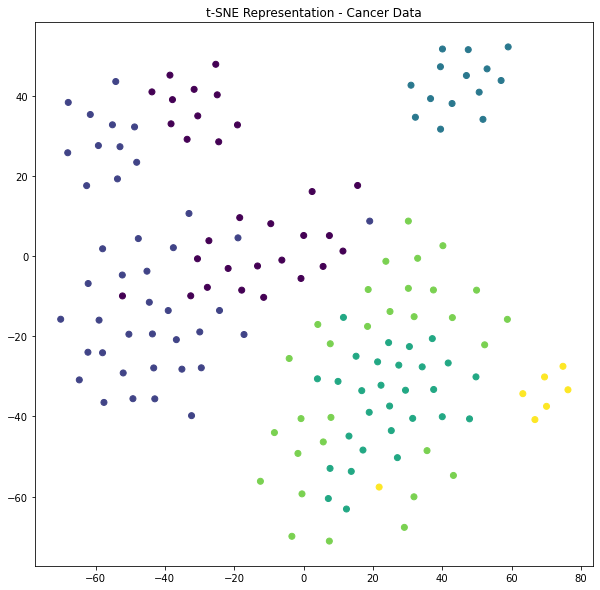

In [28]:
# Let's plot the data for better visualization

df1_tsne = []
df2_tsne = []

for x in cancer_X_tsne:
    df1_tsne.append(x[0])
    df2_tsne.append(x[1])
    
plt.figure(figsize=(10,10))
plt.scatter(df1_tsne, df2_tsne, c=df_y_encoded)
plt.title('t-SNE Representation - Cancer Data')
plt.show()

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


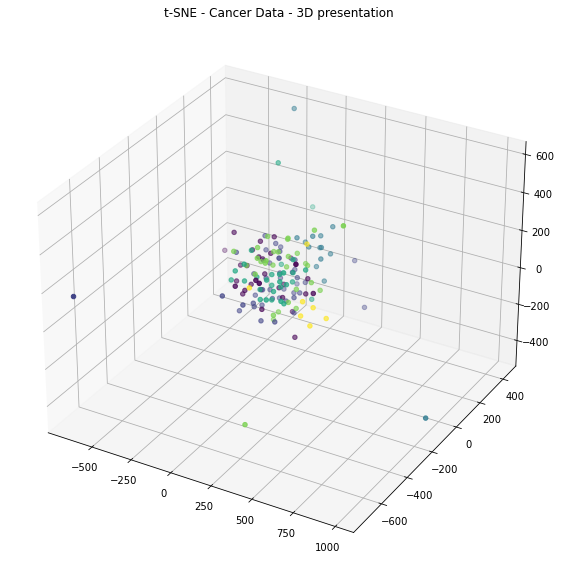

In [31]:
cancer_tsne_3D = manifold.TSNE(n_components=3, init='pca', random_state=0)
cancer_X_tsne_3D = cancer_tsne_3D.fit_transform(df_x_scaled)

# Creating figure
fig3D = plt.figure(figsize = (10, 10))
ax3D = plt.axes(projection ="3d")
 
# Creating plot
ax3D.scatter3D(cancer_X_tsne_3D[:,0], cancer_X_tsne_3D[:,1], cancer_X_tsne_3D[:,2], c=df_y_encoded)
plt.title("t-SNE - Cancer Data - 3D presentation")
 
# show plot
plt.show()